# Imports

In [2]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt
import ipywidgets        as widgets

from matplotlib.pyplot     import figure
from matplotlib.pyplot     import plot
from IPython.core.display  import HTML
from IPython.display       import Image
from geopy.geocoders       import Nominatim
from tabulate              import tabulate
from geopy                 import distance
from geopy.distance        import great_circle
from ipywidgets            import fixed

## Helper Functions

In [3]:
def personal_settings():
     # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

    # seaborn settings
    sns.set(rc={'figure.figsize':(15,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [4]:
personal_settings()

## Loading Data

In [5]:
df_raw = pd.read_csv(r'../datasets/raw/kc_house_data.csv')

In [6]:
df1=df_raw.copy()

# Data Description

In [7]:
df1=df_raw.copy()

## Rename Columns

In [8]:
# checking columns names
print(df1.columns)

# renaming 'price' to 'buying_price'
df1 = df1.rename(columns={"price": "buying_price"})

df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Index(['id', 'date', 'buying_price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Types

In [9]:
display(df1.head())
df1.dtypes

,id,date,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


id                 int64
date              object
buying_price     float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Dimension

In [10]:
print('Number of rows: {}' .format (df1.shape[0]))
print('Number of columns: {}' .format (df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## Check NA

In [11]:
df1.isna().sum()

id               0
date             0
buying_price     0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fill out NA

In [12]:
# nothing to fill

## Change Variables Types

In [13]:
# changing 'date' type from OBJECT to DATE or INT

# checking DATES types
print("------ BEFORE")
display(df1[['date','yr_built','yr_renovated']].head())
display(df1[['date','yr_built','yr_renovated']].dtypes)

# changing dtypes
df1['date']         = pd.to_datetime(df1['date'],         format='%Y-%m-%d')
# df1['yr_built']     = pd.to_datetime(df1['yr_built'],     format='%Y-%m-%d')
# df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format='%Y-%m-%d')

# checking DATES types
print("")
print("------ AFTER")
display(df1[['date','yr_built','yr_renovated']].head())
display(df1[['date','yr_built','yr_renovated']].dtypes)

------ BEFORE


,date,yr_built,yr_renovated
0,20141013T000000,1955,0
1,20141209T000000,1951,1991
2,20150225T000000,1933,0
3,20141209T000000,1965,0
4,20150218T000000,1987,0


date            object
yr_built         int64
yr_renovated     int64
dtype: object


------ AFTER


,date,yr_built,yr_renovated
0,2014-10-13,1955,0
1,2014-12-09,1951,1991
2,2015-02-25,1933,0
3,2014-12-09,1965,0
4,2015-02-18,1987,0


date            datetime64[ns]
yr_built                 int64
yr_renovated             int64
dtype: object

## Dropping Duplicates 

In [14]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.shape[0] - df1['id'].unique().shape[0], '  number of duplicated ids')

21613 number of rows
21436 uniques ids
177   number of duplicated ids


In [15]:
# sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

# deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print('new shape:', df1.shape)

new shape: (21436, 21)


## Descriptive Statistics

In [16]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [17]:
num_df1.shape

(21436, 20)

In [18]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580765328.18,3904921185.00,2876522535.73,0.24,<bound method NDFrame._add_numeric_operations....
1,buying_price,75000.00,7700000.00,7625000.00,541649.96,450000.00,367306.36,4.04,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.99,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.00,8.00,8.00,2.12,2.25,0.77,0.51,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.00,13540.00,13250.00,2082.70,1920.00,919.13,1.47,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.00,1651359.00,1650839.00,15135.64,7614.00,41537.65,13.04,<bound method NDFrame._add_numeric_operations....
6,floors,1.00,3.50,2.50,1.50,1.50,0.54,0.61,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.34,<bound method NDFrame._add_numeric_operations....
8,view,0.00,4.00,4.00,0.24,0.00,0.77,3.39,<bound method NDFrame._add_numeric_operations....
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.04,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [19]:
cat_df1.shape # no attributes

(21436, 0)

# Variable Filtering 

In [20]:
df2=df1.copy()

In [21]:
df2 = df2.drop (['view', 'sqft_living15','sqft_lot15'], axis=1)

# === notes:
# view          	An index from 0 to 4 of how good the view of the property was
# sqft_living15 	The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15    	The square footage of the land lots of the nearest 15 neighbors

In [22]:
# checking properties 'sqft_living' by number of bedrooms
print(df2[['bedrooms','sqft_living']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending=True))
print(df2[['id','bedrooms']].groupby(['bedrooms']).count(),'\n')

df2 = df2[ (df2['bedrooms']!=0) & (df2['bedrooms']!=11) & (df2['bedrooms']!=33) ]

          sqft_living
bedrooms             
1              884.94
2             1240.54
33            1620.00
0             1707.85
3             1807.60
4             2556.00
11            3000.00
5             3054.82
6             3310.76
10            3706.67
9             3775.00
8             3800.00
7             3974.21
            id
bedrooms      
0           13
1          194
2         2736
3         9731
4         6849
5         1586
6          265
7           38
8           13
9            6
10           3
11           1
33           1 



# Feature Engineering

In [23]:
df3 = df2.copy()

## Mind Map Hypothesis

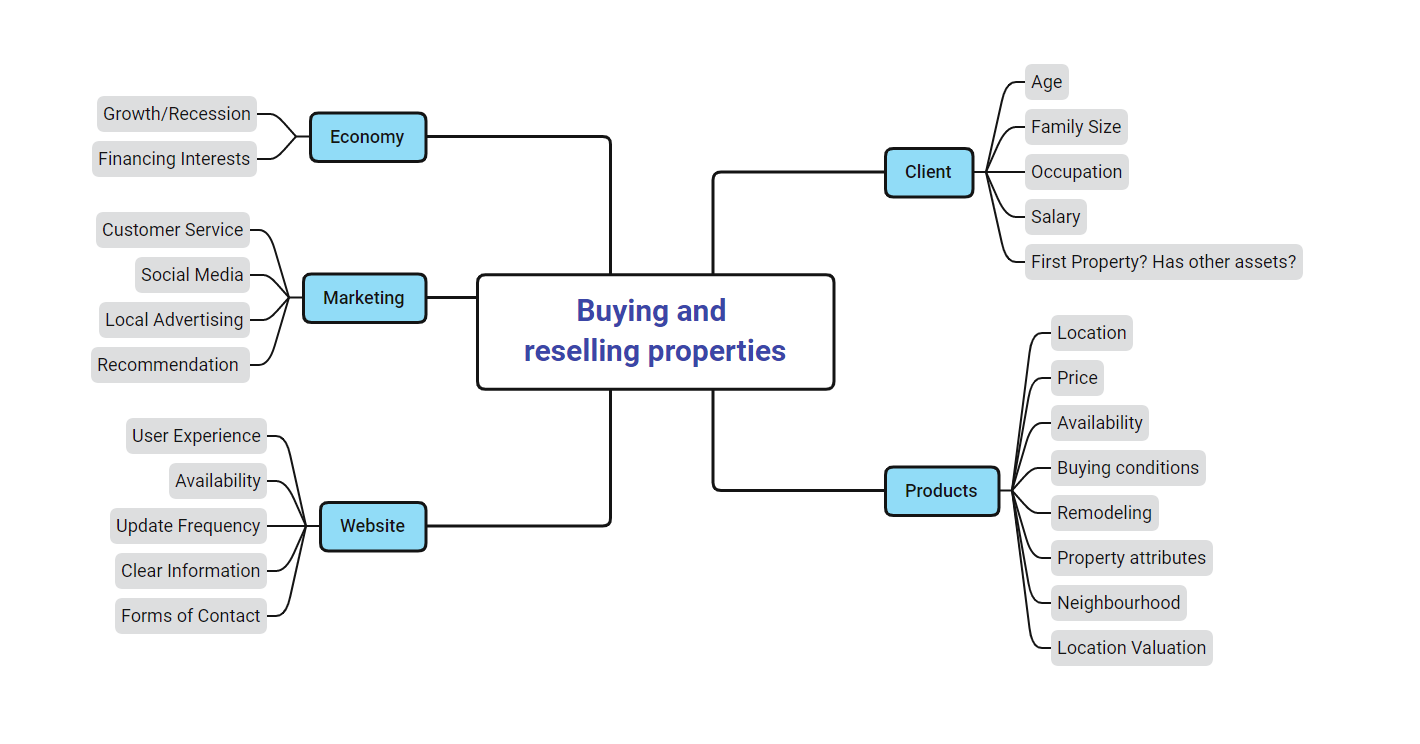

In [24]:
Image('../images/hypothesis.png', width=1000)

## Creating Hypothesis

1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade.
3. Properties with basements have bigger interior living space.
4. Properties with basements are 15% more expensive.
5. Properties built with basements decreased over the years.
6. Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
7. Properties with 3 bedrooms are 25% more expensive than those which have 2 bedrooms.
8.  Properties with 2 floors are 15% more expensive than those with 1 floor.
9. Most properties (+50%) became available during summer/spring.
10. Properties available during summer/spring are 20% more expensive.
11. Most properties (+50%) are localized in a 15km radio from the lake.
12. Most of properties (+50%) that should be bought are in a 15km radius from the lake.
13. Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.
14. Properties have bigger interior living space along construction year timeline.
15. Properties that were not renovated are 40% cheaper.

## Features Creation

In [25]:
# # get data from API in separate dataframe

# # query
# df3['query'] = df3[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)
# df_geodata = df3[['id', 'query']].copy()

# # creating empty columns
# df_geodata['place_id']      = "NA"
# df_geodata['house_number']  = 'NA'
# df_geodata['road']          = 'NA'
# df_geodata['neighbourhood'] = 'NA'
# df_geodata['city']          = 'NA'
# df_geodata['county']        = 'NA'
# df_geodata['state']         = 'NA'
# df_geodata['postcode']      = 'NA'


# # auxiliar variable that helps localizing the adresses
# geolocator = Nominatim (user_agent = 'api') 

# # loop for
# for i in range (df_geodata.shape[0]):
    
#     print ('Loop: {} / {}'.format(i, df_geodata.shape[0]))
    
#     # api request
#     response = geolocator.reverse(df3.loc[i, 'query']) # standard variable for API responses // 'reverse' returns an address by location point
    
#     # populating data
#     if 'place_id'in response.raw:
#         df_geodata.loc[i, 'place_id']      = response.raw['place_id']
#     if 'house_number'in response.raw['address']:
#         df_geodata.loc[i, 'house_number']  = response.raw['address']['house_number']
#     if 'road'in response.raw['address']:
#         df_geodata.loc[i, 'road']          = response.raw['address']['road']
#     if 'neighbourhood'in response.raw['address']:
#         df_geodata.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
#     if 'city'in response.raw['address']:
#         df_geodata.loc[i, 'city']          = response.raw['address']['city']
#     if 'county'in response.raw['address']:
#         df_geodata.loc[i,'county']         = response.raw['address']['county']
#     if 'state'in response.raw['address']:
#         df_geodata.loc[i,'state']          = response.raw['address']['state']
#     if 'postcode'in response.raw['address']:
#         df_geodata.loc[i,'postcode']       = response.raw['address']['postcode']
        
# # saving df_geodata
# df_geodata.to_csv('../datasets/interim/api_geodata_realstate.csv')

In [26]:
# getting geodata temporarily
df_geodata = pd.read_csv('../datasets/interim/api_geodata.csv')
df_geodata.head()

# merging df_geodata with df3
df3 = pd.merge(df3, df_geodata, how='left', on='id')
df3.rename(columns={'query': 'lat_long'})
df3.head()

,id,date,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,query,road,house_number,neighbourhood,city,county,state
0,5561000190,2014-05-02,437500.00,3,2.25,1970,35100,2.00,0,4,...,98027,47.46,-121.99,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington
1,472000620,2014-05-02,790000.00,3,2.50,2600,4750,1.00,0,4,...,98117,47.68,-122.40,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington
2,1024069009,2014-05-02,675000.00,5,2.50,2820,67518,2.00,0,3,...,98029,47.58,-122.03,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,2014-05-02,555000.00,4,2.50,3310,6500,2.00,0,3,...,98065,47.52,-121.87,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington
4,5056500260,2014-05-02,440000.00,4,2.25,2160,8119,1.00,0,3,...,98006,47.54,-122.18,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington


In [27]:
# radius from lake

# lake infos
lake_center = [{'lat':47.640883, 'long':-122.259250}]  # https://goo.gl/maps/iFtadEDs5RicU6Qq9
lake_tuple = 47.640883, -122.259250 

# distance from Lake
df3['dist_fromlake'] = df3['query'].apply(lambda x: great_circle(lake_tuple, x).km)

df3[['query','dist_fromlake']].sample(5) 

,query,dist_fromlake
511,"47.4866,-122.319",17.73
5669,"47.3834,-122.215",28.82
1005,"47.4902,-122.179",17.80
807,"47.6366,-122.401",10.63
9905,"47.5929,-121.974",22.04


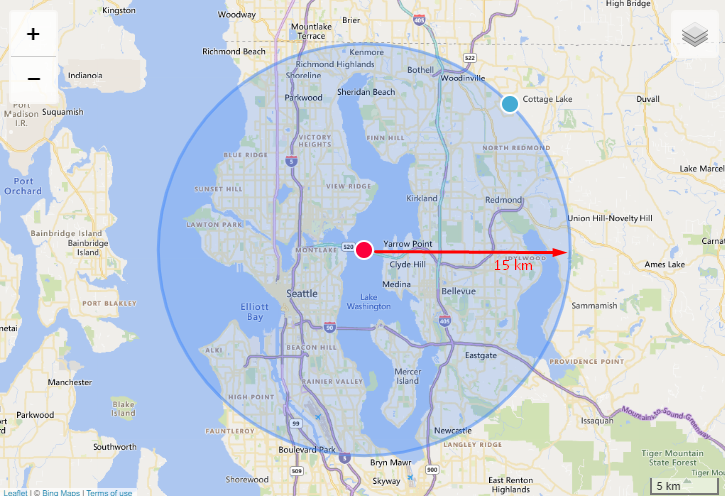

In [28]:
Image('../images/radius.png')

In [29]:
# median buying price by zipcode
a = df3[['buying_price','zipcode']].groupby('zipcode').median().reset_index().rename(columns={'buying_price': 'median_price_zipcode'})
a.head()

df3 = pd.merge(df3, a, on='zipcode', how='left')
df3[['id', 'buying_price', 'zipcode', 'median_price_zipcode']].sample(5)

,id,buying_price,zipcode,median_price_zipcode
1790,3585210200,366000.00,98034,446000.00
20084,713500020,1387000.00,98006,762684.50
12795,2822069080,390000.00,98038,342500.00
12545,1324079041,275000.00,98024,462500.00
18417,3172600031,325000.00,98106,315000.00


In [30]:
# decision: to buy x not to buy

df3['decision'] = df3[['buying_price', 'median_price_zipcode', 'condition']].apply(lambda x: 1 if ((x['buying_price'] <= x['median_price_zipcode']) & (x['condition']>=3))
                                                                                        else 0, axis=1)
                                                                        
                                                             
df3[['id', 'zipcode', 'buying_price', 'median_price_zipcode', 'condition', 'decision']].sample(5)

,id,zipcode,buying_price,median_price_zipcode,condition,decision
13533,7905380380,98034,348500.00,446000.00,3,1
6523,3793500550,98038,289950.00,342500.00,3,1
7736,1099610260,98023,212000.00,268500.00,4,1
17246,2296500036,98056,450000.00,380000.00,4,0
17053,8929000230,98029,550000.00,575000.00,3,1


In [31]:
# selling price suggestion

df3['selling_price_suggestion'] = df3[['buying_price', 'median_price_zipcode', 'condition']].apply(lambda x: x['buying_price']*1.3 if ((x['buying_price'] <= x['median_price_zipcode']) & (x['condition']>=3))
                                                                                                        else 0, axis=1)

df3[['id', 'zipcode', 'buying_price', 'median_price_zipcode', 'condition', 'decision', 'selling_price_suggestion']].sample(5)

,id,zipcode,buying_price,median_price_zipcode,condition,decision,selling_price_suggestion
5917,8081020330,98006,1320000.00,762684.50,3,0,0.00
2098,1858600012,98030,310000.00,282755.00,3,0,0.00
16313,1773101050,98106,290000.00,315000.00,4,1,377000.00
9332,272000220,98144,417000.00,457500.00,3,1,542100.00
19517,7844200120,98188,340000.00,264000.00,3,0,0.00


In [32]:
# expected profit

df3['expected_profit'] = df3[['buying_price', 'selling_price_suggestion']].apply(lambda x: 0 if x['selling_price_suggestion']==0
                                                                                        else (x['selling_price_suggestion'] - x['buying_price']), axis=1) 

df3[['id', 'zipcode', 'buying_price', 'median_price_zipcode', 'condition', 'decision', 'selling_price_suggestion', 'expected_profit']].sample(5)

,id,zipcode,buying_price,median_price_zipcode,condition,decision,selling_price_suggestion,expected_profit
16168,6607000095,98118,286000.00,370000.00,4,1,371800.00,85800.00
16985,1370804430,98199,543115.00,690000.00,3,1,706049.50,162934.50
8721,8078100260,98031,340000.00,288400.00,3,0,0.00,0.00
3170,2125049024,98112,1325000.00,920000.00,4,0,0.00,0.00
16908,643400130,98007,512500.00,560000.00,3,1,666250.00,153750.00


In [33]:
# seasons of the year

def season_from_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

df3['season'] = df3['date'].map(season_from_date)
df3[['date','season']].head()

,date,season
0,2014-05-02,spring
1,2014-05-02,spring
2,2014-05-02,spring
3,2014-05-02,spring
4,2014-05-02,spring


In [34]:
# median buying price by zipcode and season

# grouping by zipcode and median price by season
a = df3[['buying_price','zipcode','season']].groupby(['zipcode', 'season']).median().reset_index()
a.head(10)

b = a.pivot(index='zipcode', columns='season', values='buying_price').reset_index()
b = b.rename(columns={'autumn':'med_autumn', 'spring':'med_spring', 'summer':'med_summer', 'winter':'med_winter'})
b.head()

# merging with df3
df3 = pd.merge(df3, b, on='zipcode', how='left')
df3.head()

# sample
df3[['id', 'buying_price', 'zipcode', 'median_price_zipcode', 'med_autumn', 'med_spring', 'med_summer', 'med_winter']].sample(5)

,id,buying_price,zipcode,median_price_zipcode,med_autumn,med_spring,med_summer,med_winter
2841,7732501000,854000.00,98052,615000.00,599500.00,625000.00,620000.00,600750.00
20630,5101405604,395000.00,98125,425000.00,435500.00,429975.00,421750.00,425000.00
11729,7399000350,300000.00,98055,298500.00,290000.00,305000.00,293000.00,310000.00
8946,8856004730,199950.00,98001,260000.00,250000.00,262000.00,263000.00,269950.00
18717,7855801670,2250000.00,98006,762684.50,765000.00,755000.00,760000.00,791270.50


In [35]:
# best season to sell

df3['season_to_sell'] = ''


# defining best season to sell accorgding to avg price for each season
for i in range (df3.shape[0]):
    cols = ['med_autumn', 'med_spring', 'med_summer', 'med_winter']
    
    if df3.loc[i, 'decision']!=0:
    
        if df3.loc[i, cols[0]] >= df3.loc[i,'buying_price']:
            df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'autumn '
        if df3.loc[i, cols[1]] >= df3.loc[i,'buying_price']:
            df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'spring '
        if df3.loc[i, cols[2]] >= df3.loc[i,'buying_price']:
            df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'summer '
        if df3.loc[i, cols[3]] >= df3.loc[i,'buying_price']:
            df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'winter '
        


df3[['id', 'buying_price', 'zipcode', 'median_price_zipcode', 'med_autumn', 'med_spring', 'med_summer', 'med_winter', 'decision', 'season_to_sell']].head()

,id,buying_price,zipcode,median_price_zipcode,med_autumn,med_spring,med_summer,med_winter,decision,season_to_sell
0,5561000190,437500.00,98027,570500.00,545000.00,574950.00,575000.00,538100.00,1,autumn spring summer winter
1,472000620,790000.00,98117,545000.00,535000.00,545000.00,545000.00,555000.00,0,
2,1024069009,675000.00,98029,575000.00,575000.00,592500.00,561000.00,560000.00,0,
3,7853361370,555000.00,98065,502500.00,452250.00,516000.00,485000.00,528750.00,0,
4,5056500260,440000.00,98006,762684.50,765000.00,755000.00,760000.00,791270.50,1,autumn spring summer winter


In [36]:
# === reorganizing columns order
df3.columns

# old order
# 'id', 'date', 'buying_price', 'bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#        'query', 'road', 'house_number', 'neighbourhood', 'city', 'county',
#        'state', 'dist_fromlake', 'median_price_zipcode', 'decision',
#        'selling_price_suggestion', 'expected_profit', 'season', 'med_autumn',
#        'med_spring', 'med_summer', 'med_winter', 'season_to_sell'

# new order
df3=df3[['id', 'decision', 'date', 'buying_price', 'median_price_zipcode', 'selling_price_suggestion', 'expected_profit', 'condition', 'zipcode', 'dist_fromlake',
         'yr_built', 'yr_renovated', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'sqft_basement', 'floors', 'waterfront', 'grade',
         'lat', 'long', 'query', 'road', 'house_number', 'neighbourhood', 'city', 'county', 'state', 
         'season', 'med_autumn', 'med_spring', 'med_summer', 'med_winter', 'season_to_sell']]

df3.head()

,id,decision,date,buying_price,median_price_zipcode,selling_price_suggestion,expected_profit,condition,zipcode,dist_fromlake,...,neighbourhood,city,county,state,season,med_autumn,med_spring,med_summer,med_winter,season_to_sell
0,5561000190,1,2014-05-02,437500.00,570500.00,568750.00,131250.00,4,98027,28.18,...,NaN,NaN,King County,Washington,spring,545000.00,574950.00,575000.00,538100.00,autumn spring summer winter
1,472000620,0,2014-05-02,790000.00,545000.00,0.00,0.00,4,98117,11.55,...,Sunset Hill,Seattle,King County,Washington,spring,535000.00,545000.00,545000.00,555000.00,
2,1024069009,0,2014-05-02,675000.00,575000.00,0.00,0.00,3,98029,18.84,...,NaN,NaN,King County,Washington,spring,575000.00,592500.00,561000.00,560000.00,
3,7853361370,0,2014-05-02,555000.00,502500.00,0.00,0.00,3,98065,32.38,...,NaN,NaN,King County,Washington,spring,452250.00,516000.00,485000.00,528750.00,
4,5056500260,1,2014-05-02,440000.00,762684.50,572000.00,132000.00,3,98006,12.38,...,NaN,Bellevue,King County,Washington,spring,765000.00,755000.00,760000.00,791270.50,autumn spring summer winter


# EDA

In [37]:
df4 = df3.copy()

In [38]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## Univariate Analysis
    

### Response Variable - Expected Profit

In [41]:
# creating bins for 'expected_profit'
aux1 = df4[df4['expected_profit']!=0][['id', 'expected_profit']].copy()

# setting 'expected_profit' bins
bin_groups = list(np.arange(0,635000,5000)) # maximum profit = 630,000.00
aux1['expected_profit_binned'] = pd.cut(aux1['expected_profit'], bins=bin_groups)

aux1.head()

,id,expected_profit,expected_profit_binned
0,5561000190,131250.00,"(130000, 135000]"
4,5056500260,132000.00,"(130000, 135000]"
5,3438501320,88500.00,"(85000, 90000]"
6,1737320120,141000.00,"(140000, 145000]"
7,7197300105,165000.00,"(160000, 165000]"


In [42]:
# grouping in bins the number of properties ('id_') and adding the 'expected_profit'
a1 = ( aux1.groupby('expected_profit_binned').agg(qty_properties      = ('id', 'count'),
                                                  expected_profit = ('expected_profit', 'sum')) ).reset_index()




a1.head()

,expected_profit_binned,qty_properties,expected_profit
0,"(0, 5000]",0,0.00
1,"(5000, 10000]",0,0.00
2,"(10000, 15000]",0,0.00
3,"(15000, 20000]",0,0.00
4,"(20000, 25000]",2,47400.00


In [46]:
# sorting by number of 'id'
a1.sort_values('qty_properties', ascending=False).head()

,expected_profit_binned,qty_properties,expected_profit
14,"(70000, 75000]",652,47533093.50
15,"(75000, 80000]",542,42085093.50
17,"(85000, 90000]",512,44989732.50
16,"(80000, 85000]",509,41938583.10
20,"(100000, 105000]",494,50809767.30


In [47]:
# sorting by 'expected_profit'
a1.sort_values('expected_profit', ascending=False).head()

,expected_profit_binned,qty_properties,expected_profit
26,"(130000, 135000]",455,60389562.90
32,"(160000, 165000]",346,56425349.10
29,"(145000, 150000]",372,55081720.50
23,"(115000, 120000]",451,53225628.60
20,"(100000, 105000]",494,50809767.30


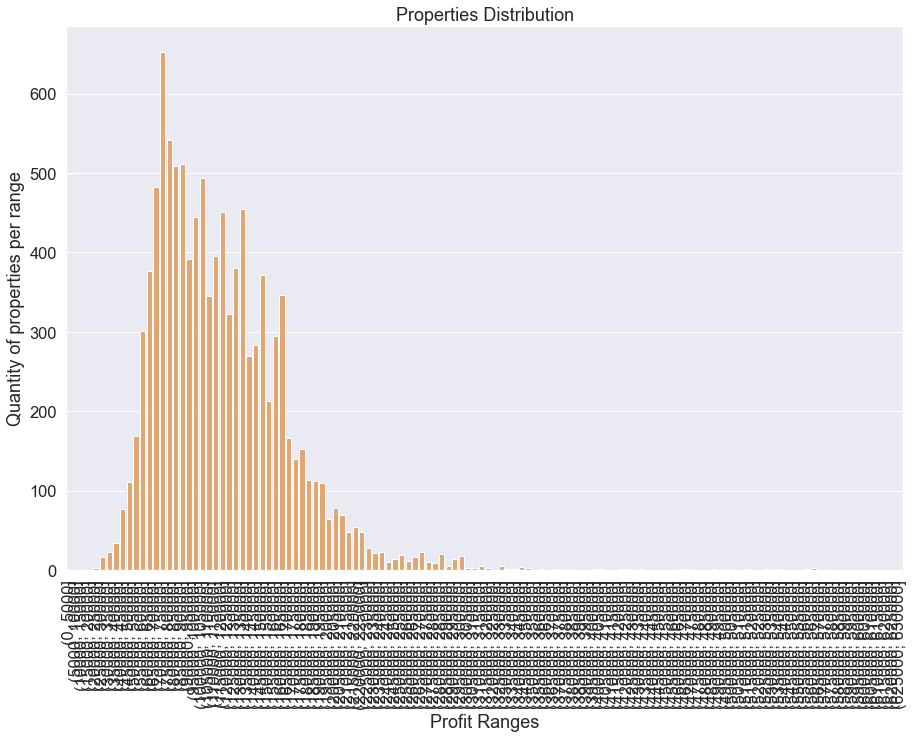

In [50]:
# id_distribution
p1 = sns.barplot(data=a1, x='expected_profit_binned', y='qty_properties', color='sandybrown')
p1.set_title('Properties Distribution')
p1.set_xlabel('Profit Ranges')
p1.set_ylabel('Quantity of properties per range')
plt.xticks(rotation=90);

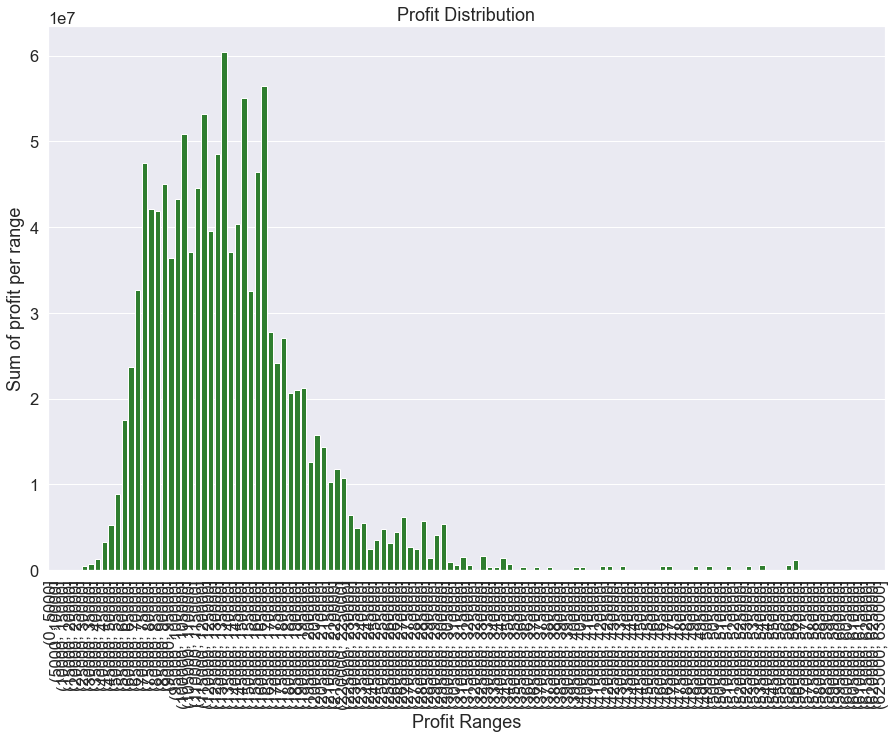

In [51]:
# profit_distribution
p2 = sns.barplot(data=a1, x='expected_profit_binned', y='expected_profit', color='forestgreen');
p2.set_title('Profit Distribution')
p2.set_xlabel('Profit Ranges')
p2.set_ylabel('Sum of profit per range')
plt.xticks(rotation=90);

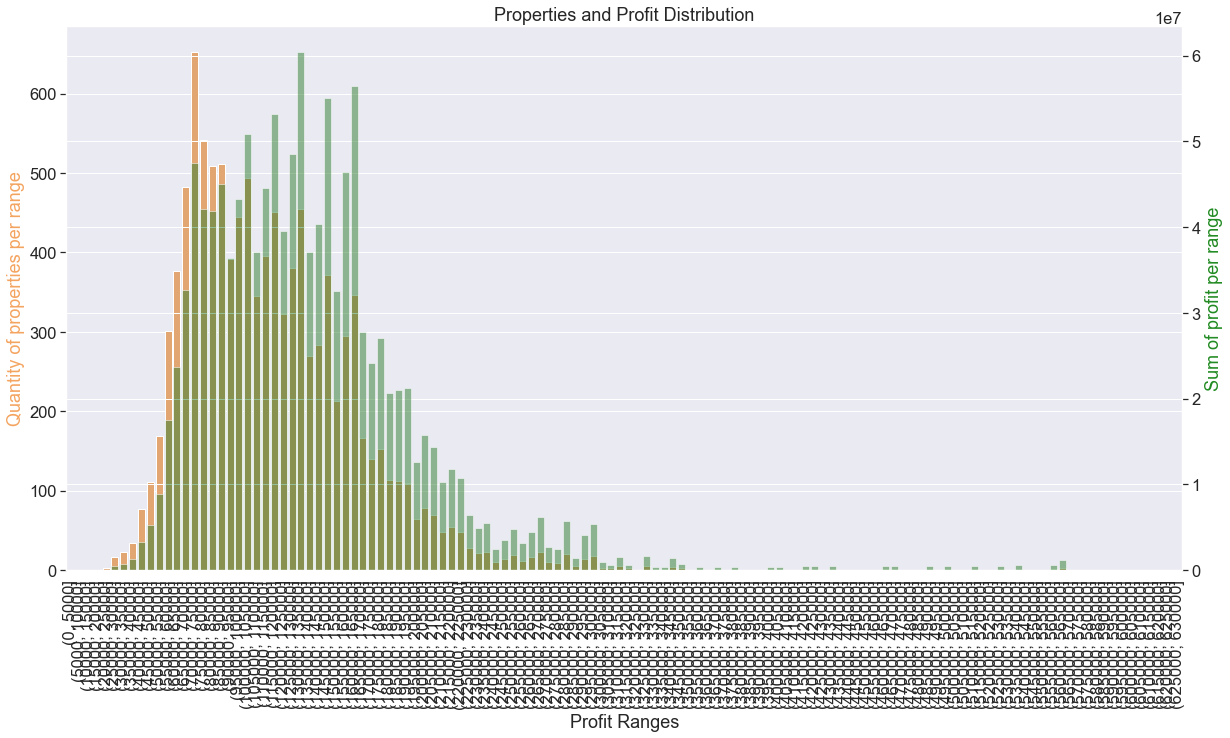

In [52]:
# creating comparision plot area
fig, ax1 = plt.subplots(figsize=(20,10))

# setting first graph - properties distribution
ax1 = sns.barplot(data=a1, x='expected_profit_binned', y='qty_properties', color='sandybrown', alpha=1)
ax1.set_title('Properties and Profit Distribution')
ax1.set_xticklabels(a1['expected_profit_binned'], rotation=90);
ax1.set_xlabel('Profit Ranges')
ax1.set_ylabel('Quantity of properties per range', color='sandybrown')
ax1.tick_params(axis='y')

# setting to share x-axis
ax2 = ax1.twinx()

# creating second graph - profit distribution
ax2 = sns.barplot(data=a1, x='expected_profit_binned', y='expected_profit', color='forestgreen', alpha=0.5)
ax2.set_ylabel('Sum of profit per range', color='forestgreen')
ax2.tick_params(axis='y')

# showing plot
plt.show()

<div class="alert alert-info", font-weight= bold> # === Zooming in </div>

In [53]:
# filtering data for better plot visualization

aux2 = df4[df4['expected_profit']!=0][['id', 'expected_profit']].copy()

# setting 'expected_profit' bins for up to 30,000.00
bin_groups = list(np.arange(0,305000,5000)) # maximum profit = 630,000.00
aux2['expected_profit_binned'] = pd.cut(aux2['expected_profit'], bins=bin_groups)

aux2.head()

,id,expected_profit,expected_profit_binned
0,5561000190,131250.00,"(130000, 135000]"
4,5056500260,132000.00,"(130000, 135000]"
5,3438501320,88500.00,"(85000, 90000]"
6,1737320120,141000.00,"(140000, 145000]"
7,7197300105,165000.00,"(160000, 165000]"


In [55]:
# grouping in bins the number of properties ('id') and adding the 'expected_profit'
a2 = ( aux2.groupby('expected_profit_binned').agg(qty_properties      = ('id', 'count'),
                                                  expected_profit = ('expected_profit', 'sum')) ).reset_index()





a2.head()

,expected_profit_binned,qty_properties,expected_profit
0,"(0, 5000]",0,0.00
1,"(5000, 10000]",0,0.00
2,"(10000, 15000]",0,0.00
3,"(15000, 20000]",0,0.00
4,"(20000, 25000]",2,47400.00


In [57]:
# sorting by number of 'id'
a2.sort_values('qty_properties', ascending=False).head()

,expected_profit_binned,qty_properties,expected_profit
14,"(70000, 75000]",652,47533093.50
15,"(75000, 80000]",542,42085093.50
17,"(85000, 90000]",512,44989732.50
16,"(80000, 85000]",509,41938583.10
20,"(100000, 105000]",494,50809767.30


In [58]:
# sorting by 'expected_profit'
a2.sort_values('expected_profit', ascending=False).head()

,expected_profit_binned,qty_properties,expected_profit
26,"(130000, 135000]",455,60389562.90
32,"(160000, 165000]",346,56425349.10
29,"(145000, 150000]",372,55081720.50
23,"(115000, 120000]",451,53225628.60
20,"(100000, 105000]",494,50809767.30


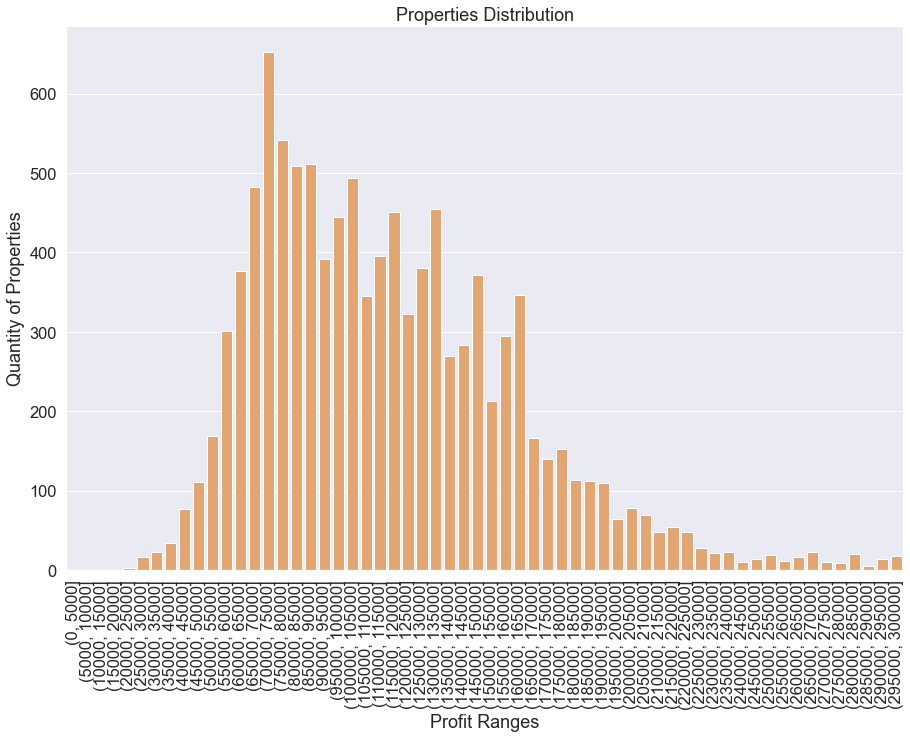

In [49]:
# id_distribution
p1 = sns.barplot(data=a2, x='expected_profit_binned', y='qty_properties', color='sandybrown')
p1.set_title('Properties Distribution')
p1.set_xlabel('Profit Ranges')
p1.set_ylabel('Quantity of properties per range')
plt.xticks(rotation=90);

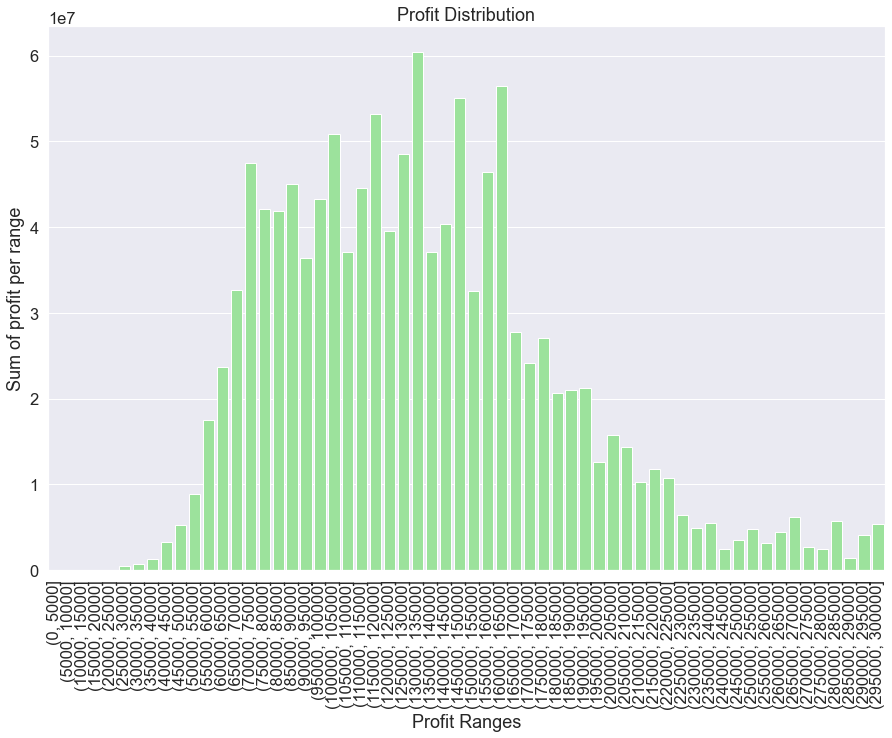

In [59]:
# profit_distribution
p2 = sns.barplot(data=a2, x='expected_profit_binned', y='expected_profit', color='lightgreen');
p2.set_title('Profit Distribution')
p2.set_xlabel('Profit Ranges')
p2.set_ylabel('Sum of profit per range')
plt.xticks(rotation=90);

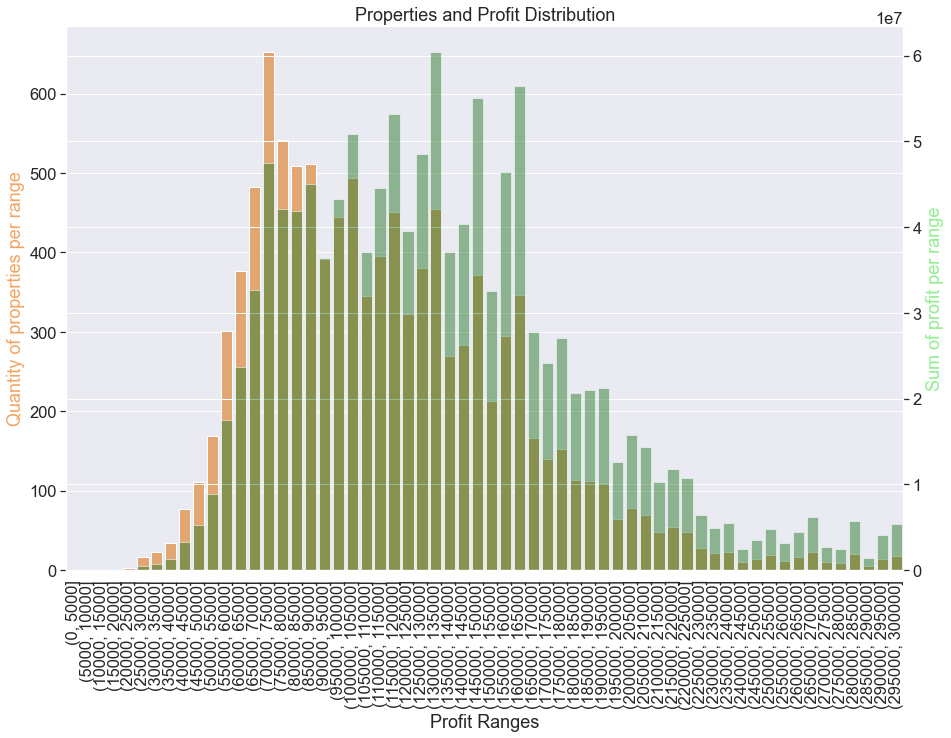

In [60]:
# creating comparision plot area
fig, ax1 = plt.subplots(figsize=(15,10))

# setting first graph - properties distribution
ax1 = sns.barplot(data=a2, x='expected_profit_binned', y='qty_properties', color='sandybrown', alpha=1)
ax1.set_title('Properties and Profit Distribution')
ax1.set_xticklabels(a2['expected_profit_binned'], rotation=90);
ax1.set_xlabel('Profit Ranges')
ax1.set_ylabel('Quantity of properties per range', color='sandybrown')
ax1.tick_params(axis='y')

# setting to share x-axis
ax2 = ax1.twinx()

# creating second graph - profit distribution
ax2 = sns.barplot(data=a2, x='expected_profit_binned', y='expected_profit', color='forestgreen', alpha=0.5)
ax2.set_ylabel('Sum of profit per range', color='lightgreen')
ax2.tick_params(axis='y')

# showing plot
plt.show()

### Numerical Variables

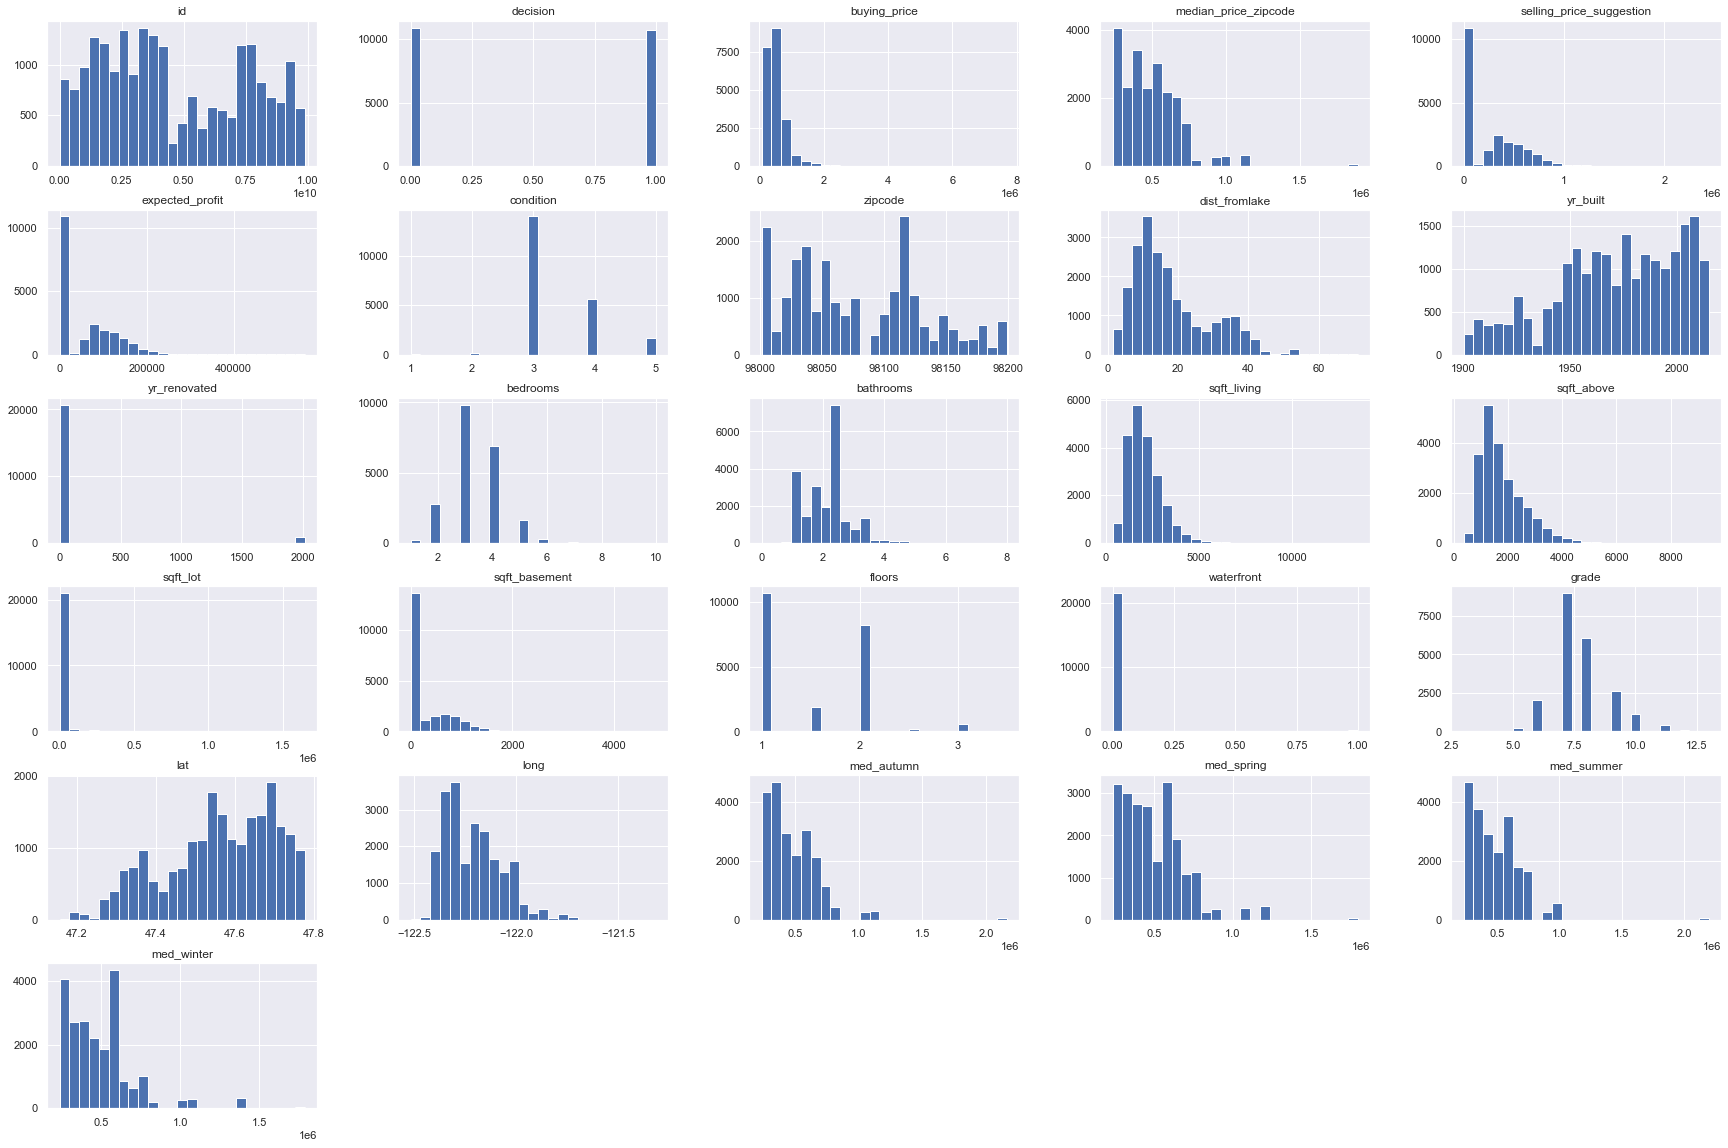

In [61]:
sns.set(rc={'figure.figsize':(30,20)})
num_df4.hist(bins=25);
personal_settings()

### Categorical Variables

In [62]:
df41 = df4.copy()

display(cat_df4.head())
print(cat_df4.dtypes)

,query,road,house_number,neighbourhood,city,county,state,season,season_to_sell
0,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring,autumn spring summer winter
1,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring,
2,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring,
3,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring,
4,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring,autumn spring summer winter


query             object
road              object
house_number      object
neighbourhood     object
city              object
county            object
state             object
season            object
season_to_sell    object
dtype: object


In [63]:
cat_df4.isna().sum()

query                 0
road                219
house_number       1264
neighbourhood     14381
city              12557
county                0
state                 0
season                0
season_to_sell        0
dtype: int64

In [64]:
address = df41[['id', 'zipcode', 'road', 'house_number', 'neighbourhood', 'city', 'county', 'state']].copy()
address.head()

,id,zipcode,road,house_number,neighbourhood,city,county,state
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County,Washington
1,472000620,98117,34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County,Washington
4,5056500260,98006,Southeast 65th Street,12201,NaN,Bellevue,King County,Washington


#### State

In [65]:
print('unique:', df41['state'].unique())
print('NA:', df41['state'].isna().sum())

unique: ['Washington']
NA: 0


#### County

In [66]:
print('unique:', df41['county'].unique())
print('NA:', df41['county'].isna().sum())

unique: ['King County' 'Snohomish County' 'Pierce County']
NA: 0


In [67]:
df41[['id', 'county']].groupby('county').count().sort_values('id', ascending=False).reset_index()

,county,id
0,King County,21581
1,Pierce County,15
2,Snohomish County,2


✔️ The city of Seattle belongs to the **multi-counties**: King County and Snohomish County. https://wa.postcodebase.com/city/SEATTLE <br>
❓ Pierce County might be an error

##### **Investigating 'Pierce County'**

In [69]:
a = address[address['county']=='Pierce County'].sort_values('zipcode', ascending=True)
a

,id,zipcode,road,house_number,neighbourhood,city,county,state
2181,3275300040,98003,17th Avenue,99,NaN,NaN,Pierce County,Washington
6714,7153400010,98003,Alder Street,2286,NaN,NaN,Pierce County,Washington
6953,3275330120,98003,19th Avenue,63,NaN,NaN,Pierce County,Washington
9107,5409800120,98003,23rd Avenue South,77,NaN,NaN,Pierce County,Washington
12660,3275300440,98003,17th Avenue,77,NaN,NaN,Pierce County,Washington
12841,3275300050,98003,17th Avenue,95,NaN,NaN,Pierce County,Washington
15020,5409800110,98003,23rd Avenue South,77,NaN,NaN,Pierce County,Washington
16075,5409800140,98003,23rd Avenue South,81,NaN,NaN,Pierce County,Washington
3395,9413400165,98022,Lumpy Lane East,52435,NaN,NaN,Pierce County,Washington
12704,3518000180,98023,58th Avenue Northeast,35017,Northeast Tacoma,NaN,Pierce County,Washington


In [70]:
# checking 'zipcode' for 'Pierce County'
a['zipcode'].sort_values(ascending=True).unique()

array([98003, 98022, 98023, 98092], dtype=int64)

✔️ **98003**
Federal Way. County King County  https://wa.postcodebase.com/zipcode5/98003

✔️ **98022**
Zipcode 98022 is across counties/cities. City ENUMCLAW. Counties King County and Pierce County https://wa.postcodebase.com/zipcode5/98022

✔️ **98023**
Federal Way.  County King County https://wa.postcodebase.com/zipcode5/98023

✔️ **98092**
Zipcode 98092 is across counties/cities. City AUBURN. Counties King County and Pierce County https://wa.postcodebase.com/zipcode5/98092

#### City

In [71]:
print('unique:', df41['city'].unique())
print('NA:', df41['city'].isna().sum())

unique: [nan 'Seattle' 'Bellevue' 'Shoreline' 'Kent' 'King County']
NA: 12557


In [72]:
df41[['id', 'city']].groupby('city').count().sort_values('id', ascending=False).reset_index()

,city,id
0,Seattle,7079
1,Bellevue,1325
2,Shoreline,630
3,Kent,5
4,King County,2


✔️ Seattle, Bellevue, Shoreline and Kent **belong** to King County https://kingcounty.gov/depts/health/codes/cities.aspx <br>
❌ King County is an error

##### Investigating 'King County' as 'city'

In [73]:
address[address['city']=='King County']

,id,zipcode,road,house_number,neighbourhood,city,county,state
11553,8075400570,98032,South 239th Street,3704,Midway,King County,King County,Washington
14475,8075400100,98032,41st Avenue South,23654,NaN,King County,King County,Washington


💡 Zipcode 98032 belongs **only** to Kent city https://wa.postcodebase.com/zipcode5/98032

##### **Inputing 'Kent' as city to 98032 'zipcode'**

In [74]:
# checking unique values for '98032' for 'city'
df41[df41['zipcode']==98032]['city'].unique()

array([nan, 'Kent', 'King County'], dtype=object)

In [75]:
# checking how many properties for '98032' are 'Kent' and 'King County' for 'city'
df41[df41['zipcode']==98032][['zipcode', 'city']].groupby('city').count().reset_index()

,city,zipcode
0,Kent,3
1,King County,2


In [76]:
# checking how many properties for '98032' are 'NaN' for 'city'
df41[df41['zipcode']==98032][['city']].isna().sum()[0]

120

In [77]:
# replacing 'city' values with 'Kent' for '98032' zipcode
df41['city'] = df41.apply(lambda x: 'Kent' if x['zipcode']==98032 else x['city'], axis=1)

df41[df41['zipcode']==98032][['zipcode', 'city']].groupby('city').count().reset_index()

,city,zipcode
0,Kent,125


##### Investigating 'city' NA

In [78]:
print("Number of 'city' NA:", df41['city'].isna().sum()) # city NA
display(address[address['city'].isna()].head())

Number of 'city' NA: 12437


,id,zipcode,road,house_number,neighbourhood,city,county,state
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County,Washington
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County,Washington
6,1737320120,98011,Northeast 195th Street,8915,NaN,NaN,King County,Washington
7,7197300105,98052,170th Avenue Northeast,9105,NaN,NaN,King County,Washington


In [79]:
# counting how many 'city' and 'neighourhood' are 'NA'
print(address[(address['city'].isna()) & (address['neighbourhood'].isna())].shape[0], 'both city and neighbourhood are NA')
print(address[(address['city'].isna()) & (~address['neighbourhood'].isna())].shape[0], 'city NA and neighbourhood filled')

9185 both city and neighbourhood are NA
3372 city NA and neighbourhood filled


In [80]:
# counting how many 'zipcode's to NA 'city'
print("number of zipcodes with NA 'city':", address[address['city'].isna()][['zipcode', 'city']].groupby('zipcode').count().reset_index().shape[0])
address[address['city'].isna()][['zipcode', 'city']].groupby('zipcode').count().reset_index().sample(5)

number of zipcodes with NA 'city': 52


,zipcode,city
34,98070,0
45,98155,0
38,98077,0
1,98002,0
48,98177,0


#### Filling other 'NA' from address (if new infos became available)

In [81]:
cat_df4 = df41.select_dtypes(exclude=['int64','float64','datetime64[ns]'])
cat_df4.isna().sum()

query                 0
road                219
house_number       1264
neighbourhood     14381
city              12437
county                0
state                 0
season                0
season_to_sell        0
dtype: int64

In [82]:
# filling NAs

# == before
# road               219
# house_number      1264
# neighbourhood    14381
# city             12557

# == after
# road               219
# house_number      1264
# neighbourhood    14381
# city             12437

In [83]:
address.head()

,id,zipcode,road,house_number,neighbourhood,city,county,state
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County,Washington
1,472000620,98117,34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County,Washington
4,5056500260,98006,Southeast 65th Street,12201,NaN,Bellevue,King County,Washington


## Bivariate Analysis

In [84]:
df42 = df41.copy()

1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade.
3. Properties with basements have bigger interior living space.
4. Properties with basements are 15% more expensive.
5. Properties built with basements decreased over the years.
6. Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
7. Properties with 3 bedrooms are 25% more expensive than those which have 2 bedrooms.
8.  Properties with 2 floors are 15% more expensive than those with 1 floor.
9. Most properties (+50%) became available during summer/spring.
10. Properties available during summer/spring are 20% more expensive.
11. Most properties (+50%) are localized in a 15km radius from the lake.
12. Most of properties (+50%) that should be bought are in a 15km radius from the lake.
13. Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.
14. Properties have bigger interior living space along construction year timeline.
15. Properties that were not renovated are 40% cheaper.

In [75]:
# hypothesis overview
tab = [ ['Hypothesis', 'Result', 'Relevance', 'Conclusion'],
        ['H01','False','High'  , 'Properties that have water view are more than 200% more expensive.'],
        ['H02','True' ,'Low'   , 'Properties with basements have a slightly lower grade.'],
        ['H03','True' ,'Low'   , 'Properties with basement have bigger interior living space on average.'],
        ['H04','False','High'  , 'Properties with basement are 27.84 % more expensive.'],
        ['H05','True' ,'High'  , 'Properties built with basements decreased after the 80s.'],
        ['H06','False','High'  , 'Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.'],
        ['H07','False','Low'   , 'Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.'],
        ['H08','False','Low'   , 'Properties with 2 floors are 29.25 % more expensive than those with 1 floor.'],
        ['H09','True' ,'High'  , 'Almost 60% of the properties became available during summer/spring.'],
        ['H10','False','Low'   , 'Properties available during summer/spring are 4,5% more expensive.'],
        ['H11','True' ,'High'  , '50% of the properties are localized in a 15km radius from the lake.'],
        ['H12','True' ,'High'  , '50% of properties that should be bought are in a 15km radius from the lake.'],
        ['H13','True' ,'High'  , 'Properties selected to be bought in a 15km radius from lake correspond to almost 60% of expected profit.'],
        ['H14','True' ,'High'  , 'Properties have bigger interior living space along construction year timeline.'],
        ['H15','True' ,'High'  , 'Properties that were not renovated are 43.17% cheaper.'],
        
      ]

print(tabulate(tab, headers='firstrow', colalign=['center','center','center','left']))

 Hypothesis    Result    Relevance   Conclusion
------------  --------  -----------  --------------------------------------------------------------------------------------------------------
    H01        False       High      Properties that have water view are more than 200% more expensive.
    H02         True        Low      Properties with basements have a slightly lower grade.
    H03         True        Low      Properties with basement have bigger interior living space on average.
    H04        False       High      Properties with basement are 27.84 % more expensive.
    H05         True       High      Properties built with basements decreased after the 80s.
    H06        False       High      Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.
    H07        False        Low      Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.
    H08        False        Low      Properties with 2 floors are 2

### Properties that have water view are 50% more expensive.
**False:** Properties that have water view are more than 200% more expensive.

In [76]:
a = df42[['waterfront', 'buying_price']].groupby('waterfront').mean().reset_index()
print(a)

hasnot_waterfront = a.iloc[0,1]
has_waterfront = a.iloc[1,1]

percentage = abs( ((has_waterfront - hasnot_waterfront) / hasnot_waterfront)*100 )
print('\nProperties that have water view are', '{:,.2f}'.format(percentage),'% more expensive')

   waterfront  buying_price
0           0     532755.38
1           1    1661876.02

Properties that have water view are 211.94 % more expensive


### Properties with basements have higher grade.
**True:** Properties with basements have a *slightly* lower grade.

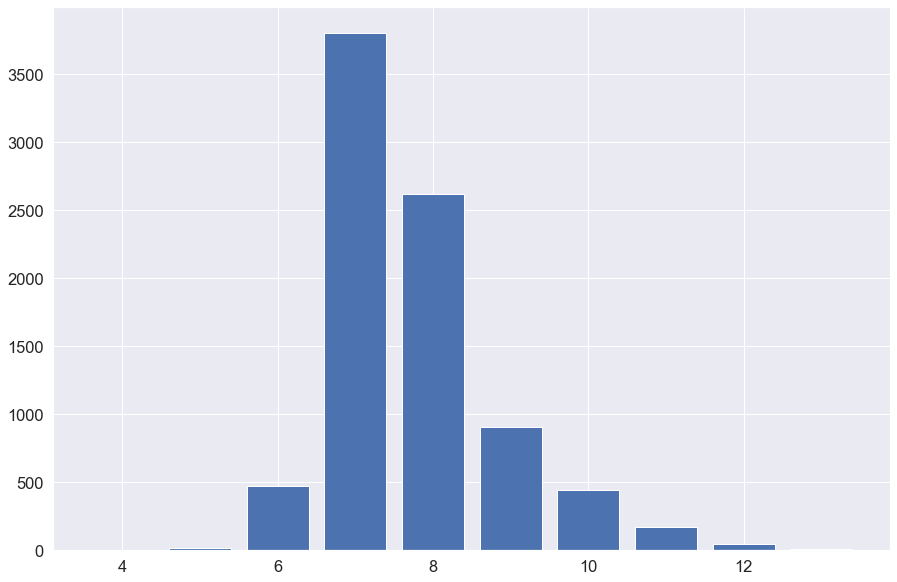

In [77]:
# properties with basement

a = df42[df42['sqft_basement']!=0][['id', 'grade', 'sqft_basement']].copy()
#print(a.head(), '\n')
#print(a.shape)

has_basement = a[['id','grade']].groupby('grade').count().reset_index()
plt.bar(has_basement['grade'], has_basement['id'])
plt.rcParams['figure.figsize'] = (10,8)

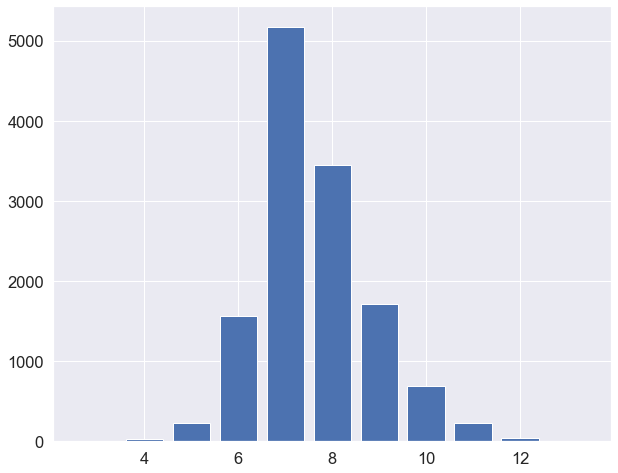

In [78]:
# properties without basement

a = df42[df42['sqft_basement']==0][['id', 'grade', 'sqft_basement']].copy()
#print(a.head(), '\n')
#print(a.shape)

hasnot_basement = a[['id','grade']].groupby('grade').count().reset_index()
plt.bar(hasnot_basement['grade'], hasnot_basement['id'])
plt.rcParams['figure.figsize'] = (10,8)

In [79]:
# weighted average grade
w_avg_has = np.average(np.array(has_basement['grade']), weights=np.array(has_basement['id']))
print('Weighted average grade for properties with basement: {:,.2f}'.format(w_avg_has))

w_avg_hasnot = np.average(np.array(hasnot_basement['grade']), weights=np.array(hasnot_basement['id']))
print('Weighted average grade for properties without basement: {:,.2f}'.format(w_avg_hasnot))

print('\nSmall difference, not relevant.')

Weighted average grade for properties with basement: 7.73
Weighted average grade for properties without basement: 7.61

Small difference, not relevant.


### Properties with basements have bigger interior living space.
**True:** Properties with basement have bigger interior living space on average.

In [80]:
has_basement = df42[df42['sqft_basement']!=0][['sqft_living']].mean()
has_basement

sqft_living   2313.47
dtype: float64

In [81]:
hasnot_basement = df42[df42['sqft_basement']==0][['sqft_living']].mean()
hasnot_basement

sqft_living   1929.10
dtype: float64

### Properties with basements are 15% more expensive.
**False:** Properties with basement are 27.84 % more expensive.

In [82]:
has_basement = df42[df42['sqft_basement']!=0][['buying_price']].mean()[0]
print('Average price of properties with basement: {:,.2f}'.format(has_basement))

hasnot_basement = df42[df42['sqft_basement']==0][['buying_price']].mean()[0]
print('Average price of properties without basement: {:,.2f}'.format(hasnot_basement))

percentage = abs( ((has_basement - hasnot_basement) / hasnot_basement)*100 )
print('Properties with basement are', '{:,.2f}'.format(percentage),'% more expensive.')

Average price of properties with basement: 623,736.19
Average price of properties without basement: 487,920.05
Properties with basement are 27.84 % more expensive.


### Properties built with basements decreased over the years.
**True:** Properties built with basements decreased after the 80s.

In [83]:
p = df42[['id', 'yr_built']].groupby('yr_built').count().reset_index() 
p.head() # number of properties

,yr_built,id
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45


In [84]:
b = df42[df42['sqft_basement']!=0][['sqft_basement','yr_built']].groupby('yr_built').count().reset_index()
b.head() # properties with basement

,yr_built,sqft_basement
0,1900,29
1,1901,11
2,1902,5
3,1903,10
4,1904,21


In [85]:
comparision = pd.merge(p, b, on='yr_built', how='left').rename(columns={'id': 'properties', 'sqft_basement': 'has_b'})
comparision['hasnot_b'] = comparision['properties'] - comparision['has_b']
comparision.sample()

,yr_built,properties,has_b,hasnot_b
65,1965,187,103,84


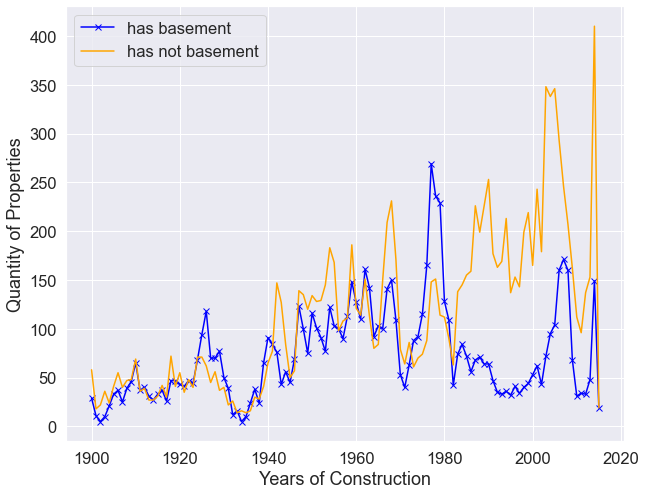

In [86]:
plt.plot(comparision['yr_built'], comparision['has_b'], color='blue', marker='x', label='has basement')
plt.plot(comparision['yr_built'], comparision['hasnot_b'], color='orange', label='has not basement')
plt.xlabel('Years of Construction')
plt.ylabel('Quantity of Properties')
plt.legend()
plt.show()

### Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
**False:** Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.

In [87]:
a = df42[['id', 'bathrooms', 'buying_price']].copy()
a.head()

b = (a.groupby('bathrooms').agg(properties = ('id', 'count'),
                                avg_price  = ('buying_price', 'mean'))).reset_index()

b1 = b[b['bathrooms']<=1] # up to 1 bathroom
b1_mean = b1['avg_price'].mean()
print('Average price of properties with up to 1 bathroom: {:,.2f}'.format(b1_mean))

b2 = b[(b['bathrooms']>1) & (b['bathrooms']<=2)] # 1 to 2 bathrooms
b2_mean = b2['avg_price'].mean()
print('Average price of properties with 1 to 2 bathroom: {:,.2f}'.format(b2_mean))

percentage = abs( ((b2_mean - b1_mean) / b1_mean)*100 )
print('Properties with 1 to 2 bathrooms are', '{:,.2f}'.format(percentage),'% more expensive.')

Average price of properties with up to 1 bathroom: 290,641.99
Average price of properties with 1 to 2 bathroom: 486,960.05
Properties with 1 to 2 bathrooms are 67.55 % more expensive.


### Properties with 3 bedrooms are  25% more expensive than those which have 2 bedrooms.
**False:** Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.

In [88]:
a = df42[['id', 'bedrooms', 'buying_price']].copy()
a.head()

b = (a.groupby('bedrooms').agg(properties = ('id', 'count'),
                               avg_price  = ('buying_price', 'mean'))).reset_index()

b2 = b.iloc[1,2]
b3 = b.iloc[2,2]

print('Average price of properties with 2 bedrooms:', b2)
print('Average price of properties with 3 bedrooms:', b3)

percentage = abs( ((b3 - b2) / b2)*100 )
print('Properties with 3 bedrooms are ', '{:,.2f}'.format(percentage),'% more expensive than those which have 2 bedrooms.')

Average price of properties with 2 bedrooms: 402666.2144927536
Average price of properties with 3 bedrooms: 467491.715492671
Properties with 3 bedrooms are  16.10 % more expensive than those which have 2 bedrooms.


### Properties with 2 floors are 15% more expensive than those with 1 floor. 
**False:** Properties with 2 floors are 29.25 % more expensive than those with 1 floor.

In [89]:
a = df42[['id', 'floors', 'buying_price']].copy()
a.head()

b = (a.groupby('floors').agg(properties = ('id', 'count'),
                             avg_price  = ('buying_price', 'mean'))).reset_index()
b.head()

f1 = b[b['floors']<2] # less than 2 floors
f1_mean = f1['avg_price'].mean()
print('Average price of properties with less than 2 floors: {:,.2f}'.format(f1_mean))

f2= b[b['floors']==2] # with 2 floors
f2_mean = f2['avg_price'].mean()
print('Average price of properties with 2 floors: {:,.2f}'.format(f2_mean))

percentage = abs( ((f2_mean - f1_mean) / f1_mean)*100 )
print('Properties with 2 floors are {:,.2f}'.format(percentage),'% more expensive than those with 1 floor.')

Average price of properties with less than 2 floors: 502,454.56
Average price of properties with 2 floors: 649,419.53
Properties with 2 floors are 29.25 % more expensive than those with 1 floor.


### Most properties (+50%) became available during summer/spring.
**True:** Almost 60% of the properties became available during summer/spring.

In [90]:
a = df42[['season', 'id']].copy()

a['SS_AW'] = a.apply(lambda x: 'SS' if x['season']=='summer' 
                          else 'SS' if x['season']=='spring' 
                          else 'AW', axis=1)


b = a[['SS_AW', 'id']].groupby('SS_AW').count().sort_values('id', ascending=False).reset_index()
b['cumultive_%'] = b['id'].cumsum()/b['id'].sum()*100
b.head()

,SS_AW,id,cumultive_%
0,SS,12916,59.80
1,AW,8682,100.00


### Properties available during summer/spring are 20% more expensive.
**False:** Properties available during summer/spring are 4,5% more expensive.

In [91]:
a = df42[['id', 'season', 'buying_price']].copy()

a['SS_AW'] = a.apply(lambda x: 'SS' if x['season']=='summer' 
                          else 'SS' if x['season']=='spring' 
                          else 'AW', axis=1)

b = (a.groupby('SS_AW').agg(properties   = ('id', 'count'),
                            price_min    = ('buying_price', 'min'),
                            price_max    = ('buying_price', 'max'),
                            price_median = ('buying_price', 'median'),
                            price_mean   = ('buying_price', 'mean')) ).sort_values('price_mean', ascending=False).reset_index()

SS_mean = b.iloc[0,5]
AW_mean = b.iloc[1,5]

percentage = abs( ((SS_mean - AW_mean) / AW_mean)*100 )
print('Properties with available during Summer/Spring are', '{:,.2f}'.format(percentage),'% more expensive.')

b.head()

Properties with available during Summer/Spring are 4.50 % more expensive.


,SS_AW,properties,price_min,price_max,price_median,price_mean
0,SS,12916,78000.00,7062500.00,462604.00,550812.02
1,AW,8682,75000.00,7700000.00,437609.00,527091.59


### Most properties (+50%) are localized in a 15km radius from the lake.
**True:** 50% of the properties are localized in a 15km radius from the lake.

In [92]:
a = df4[['id', 'dist_fromlake']].copy()

bin_groups = list(np.arange(0,90,15)) # maximum dist =~ 71
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)

b = a[['dist_fromlake_binned', 'id']].groupby('dist_fromlake_binned').count().sort_values('id', ascending=False).reset_index()

b['cumultive_%'] = b['id'].cumsum()/b['id'].sum()*100

b.head()

,dist_fromlake_binned,id,cumultive_%
0,"(0, 15]",10979,50.83
1,"(15, 30]",6658,81.66
2,"(30, 45]",3692,98.75
3,"(45, 60]",252,99.92
4,"(60, 75]",17,100.00


### Most of properties (+50%) that should be bought are in a 15km radius from the lake.
**True:** 50% of properties that should be bought are in a 15km radius from the lake.

In [93]:
a = df4[df4['decision']!=0][['id', 'dist_fromlake', 'decision']].copy()

bin_groups = list(np.arange(0,90,15)) # maximum dist =~ 71 km
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)
a.head()

b = a[['dist_fromlake_binned', 'decision']].groupby('dist_fromlake_binned').count().sort_values('decision', ascending=False).reset_index()

b['cumultive_%']=b['decision'].cumsum()/b['decision'].sum()*100

b.head()

,dist_fromlake_binned,decision,cumultive_%
0,"(0, 15]",5328,49.76
1,"(15, 30]",3391,81.43
2,"(30, 45]",1852,98.73
3,"(45, 60]",121,99.86
4,"(60, 75]",15,100.00


### <font color = 'red'> Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.
**True:** Properties selected to be bought in a 15km radius from lake correspond to almost 60% of expected profit.

In [94]:
a = df4[df4['expected_profit']!=0][['id', 'dist_fromlake', 'expected_profit']].copy()

bin_groups = list(np.arange(0,90,15)) # maximum dist =~ 71
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)
a.head()

b = ( a[['dist_fromlake_binned', 'expected_profit']].groupby('dist_fromlake_binned')
                                                    .agg(profit_min    = ('expected_profit', 'min'),
                                                         profit_max    = ('expected_profit', 'max'),
                                                         profit_median = ('expected_profit', 'median'),
                                                         profit_mean   = ('expected_profit', 'mean'),
                                                         profit_sum    = ('expected_profit', 'sum'),) ).reset_index()

b['cumulative_%']=b['profit_sum'].cumsum()/b['profit_sum'].sum()*100

b['max_dist'] = [15, 30, 45, 60, 75]

b.head()

,dist_fromlake_binned,profit_min,profit_max,profit_median,profit_mean,profit_sum,cumulative_%,max_dist
0,"(0, 15]",27000.00,564000.00,130800.00,138785.31,739448133.60,59.20,15
1,"(15, 30]",24900.00,222000.00,96000.00,105295.36,357056558.10,87.78,30
2,"(30, 45]",26700.00,150000.00,74700.00,77317.01,143191103.40,99.25,45
3,"(45, 60]",22500.00,113700.00,70500.00,69607.67,8422527.90,99.92,60
4,"(60, 75]",40200.00,124500.00,50100.00,66540.00,998100.00,100.00,75


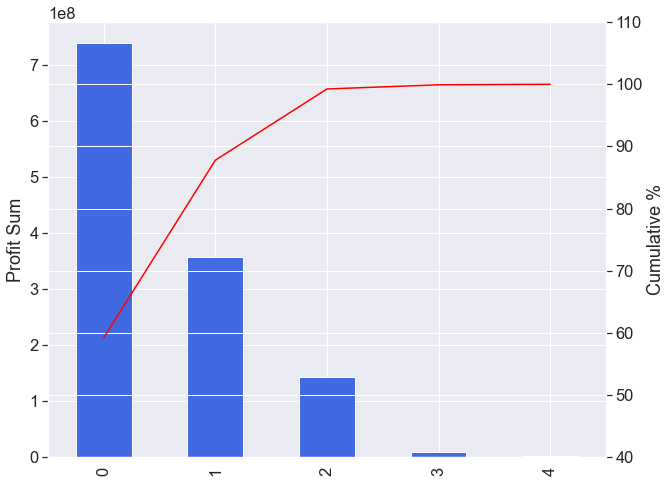

In [95]:
fig = plt.figure() # creating matplotlib figure

ax = fig.add_subplot() # creating matplotlib axes
ax2 = ax.twinx() # creating another axes that shares the same x-axis as ax.

b['profit_sum'].plot(kind='bar', color='royalblue', ax=ax)
b['cumulative_%'].plot(kind='line', color='red', ax=ax2)

ax.set_ylabel('Profit Sum')
ax2.set_ylabel('Cumulative %')
ax2.set_ylim([40,110])


plt.show()

### Properties have bigger interior living space along construction year timeline.
**True:** Properties have bigger interior living space along construction year timeline.

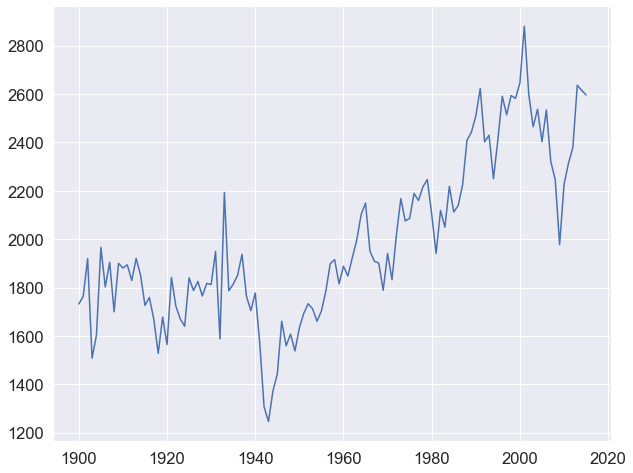

In [96]:
a = df42[['sqft_living', 'yr_built']].copy()

b = a.groupby('yr_built').mean().reset_index()

plt.plot(b['yr_built'], b['sqft_living'])
plt.show()

### Properties that were not renovated are 40% cheaper.
**True:** Properties that were not renovated are 43.17% cheaper.

In [97]:
a = df42[['buying_price', 'yr_renovated']].copy()

a['was_renovated'] = a.apply(lambda x: 0 if x['yr_renovated']==0 else 1, axis=1)

b = a[['was_renovated', 'buying_price']].groupby('was_renovated').mean().reset_index()

wasnot_renovated = b.iloc[0,1]
was_renovated = b.iloc[1,1]

print('Average price of properties that were not renovated: {:,.2f}'.format(wasnot_renovated))
print('Average price of properties that were renovated: {:,.2f}'.format(was_renovated))

percentage = abs( ((was_renovated - wasnot_renovated) / wasnot_renovated)*100 )
print('Properties that were not renovated are {:,.2f}'.format(percentage),'% cheaper.')

Average price of properties that were not renovated: 531,576.85
Average price of properties that were renovated: 761,040.56
Properties that were not renovated are 43.17 % cheaper.


## Multivariate Analysis

In [85]:
df43 = df42.copy()

### Numerical Attributes

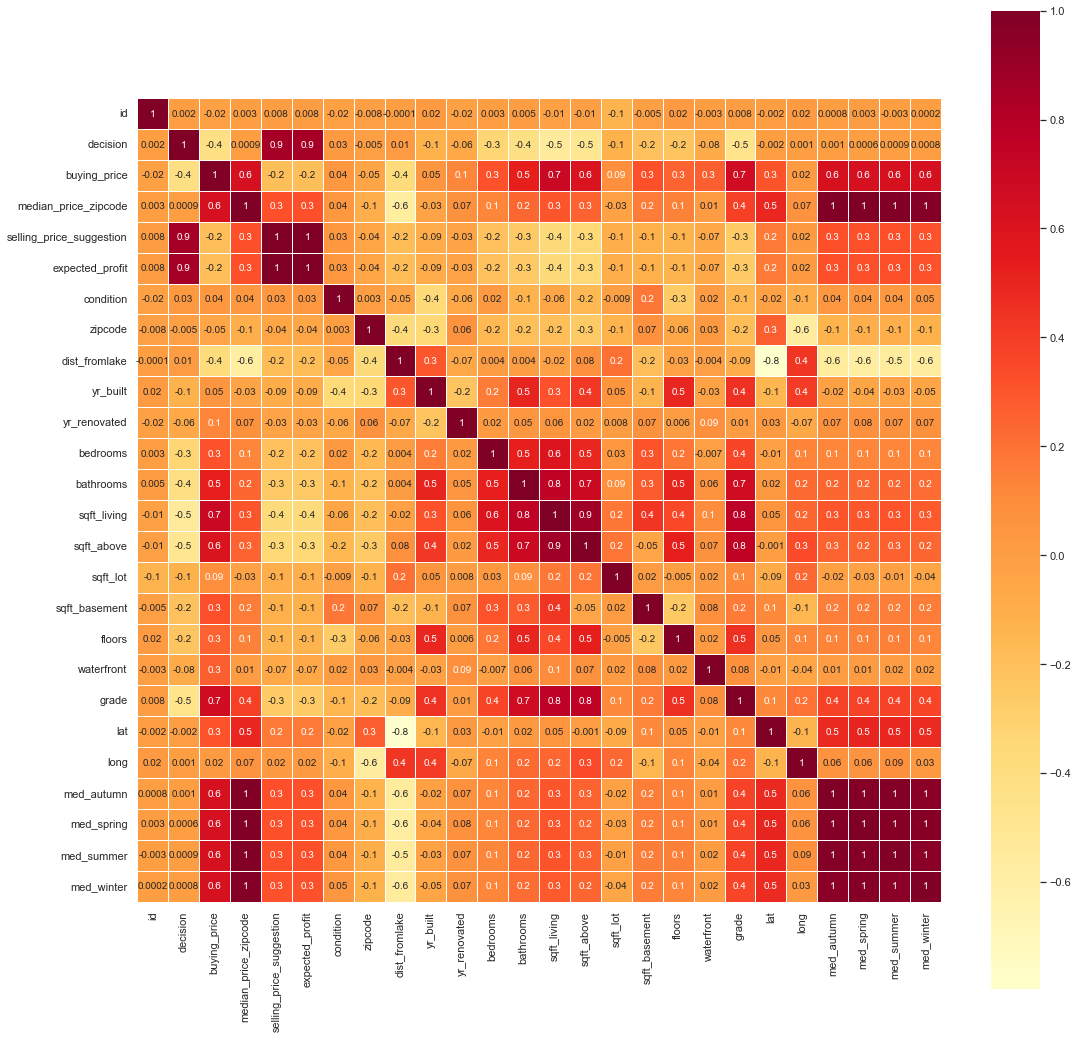

In [86]:
correlation = num_df4.corr(method='pearson')

sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(correlation, 
            cmap='YlOrRd', 
            annot=True, 
            annot_kws= {'fontsize':'small'},
            fmt='.1g',
            linewidths=0.8, 
            square=True);

personal_settings()

In [100]:
# correlation.where( ((correlation <= -0.5) | (correlation >=0.5 )) & (correlation != 1) , other='')

### Categorical Attributes

In [87]:
print(cat_df4.shape)
cat_df4.head()

(21598, 9)


,query,road,house_number,neighbourhood,city,county,state,season,season_to_sell
0,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring,autumn spring summer winter
1,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring,
2,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring,
3,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring,
4,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring,autumn spring summer winter


# Conclusion and Visualization

In [88]:
df5 = df43.copy()

In [89]:
df5.columns

Index(['id', 'decision', 'date', 'buying_price', 'median_price_zipcode',
       'selling_price_suggestion', 'expected_profit', 'condition', 'zipcode',
       'dist_fromlake', 'yr_built', 'yr_renovated', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_above', 'sqft_lot', 'sqft_basement', 'floors',
       'waterfront', 'grade', 'lat', 'long', 'query', 'road', 'house_number',
       'neighbourhood', 'city', 'county', 'state', 'season', 'med_autumn',
       'med_spring', 'med_summer', 'med_winter', 'season_to_sell'],
      dtype='object')

## Mainly Insights

**H05 - Properties built with basements decreased over the years.**<br>
Properties built with basements decreased after the 80s.

**H10 - Most properties (+50%) became available during summer/spring.**<br>
Almost 60% of the properties became available during summer/spring.

**H12 - Most of properties (+50%) that should be bought are in a 15km radius from the lake.**<br>
50% of properties that should be bought are in a 15km radius from the lake.

**H13 - Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.** <br>
Properties selected to be bought in a 15km radius from lake correspond to 60% of expected profit.

## Decision Overview

In [92]:
decision = df5[df5['decision']==1]
decision = decision.drop(columns='decision')
decision.head()

,id,date,buying_price,median_price_zipcode,selling_price_suggestion,expected_profit,condition,zipcode,dist_fromlake,yr_built,...,neighbourhood,city,county,state,season,med_autumn,med_spring,med_summer,med_winter,season_to_sell
0,5561000190,2014-05-02,437500.00,570500.00,568750.00,131250.00,4,98027,28.18,1977,...,NaN,NaN,King County,Washington,spring,545000.00,574950.00,575000.00,538100.00,autumn spring summer winter
4,5056500260,2014-05-02,440000.00,762684.50,572000.00,132000.00,3,98006,12.38,1966,...,NaN,Bellevue,King County,Washington,spring,765000.00,755000.00,760000.00,791270.50,autumn spring summer winter
5,3438501320,2014-05-02,295000.00,315000.00,383500.00,88500.00,3,98106,12.85,2009,...,NaN,Seattle,King County,Washington,spring,315000.00,312250.00,315000.00,325000.00,autumn spring summer winter
6,1737320120,2014-05-02,470000.00,470000.00,611000.00,141000.00,3,98011,14.60,1976,...,NaN,NaN,King County,Washington,spring,452000.00,478500.00,460000.00,512500.00,spring winter
7,7197300105,2014-05-02,550000.00,615000.00,715000.00,165000.00,4,98052,11.84,1976,...,NaN,NaN,King County,Washington,spring,599500.00,625000.00,620000.00,600750.00,autumn spring summer winter


In [93]:
# business attributes
decision[['id', 'date', 'buying_price', 'median_price_zipcode', 'selling_price_suggestion', 'expected_profit', 'condition', 'zipcode', 'dist_fromlake']].head()

,id,date,buying_price,median_price_zipcode,selling_price_suggestion,expected_profit,condition,zipcode,dist_fromlake
0,5561000190,2014-05-02,437500.00,570500.00,568750.00,131250.00,4,98027,28.18
4,5056500260,2014-05-02,440000.00,762684.50,572000.00,132000.00,3,98006,12.38
5,3438501320,2014-05-02,295000.00,315000.00,383500.00,88500.00,3,98106,12.85
6,1737320120,2014-05-02,470000.00,470000.00,611000.00,141000.00,3,98011,14.60
7,7197300105,2014-05-02,550000.00,615000.00,715000.00,165000.00,4,98052,11.84


In [94]:
# properties attributes
decision[['id', 'date', 'condition', 'dist_fromlake','zipcode',  'neighbourhood', 'yr_built', 'yr_renovated',
          'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
          'buying_price', 'median_price_zipcode', 'selling_price_suggestion', 'expected_profit',
          'season_to_sell', 'med_autumn', 'med_spring', 'med_summer', 'med_winter']].head()

,id,date,condition,dist_fromlake,zipcode,neighbourhood,yr_built,yr_renovated,bedrooms,bathrooms,...,sqft_basement,buying_price,median_price_zipcode,selling_price_suggestion,expected_profit,season_to_sell,med_autumn,med_spring,med_summer,med_winter
0,5561000190,2014-05-02,4,28.18,98027,NaN,1977,0,3,2.25,...,0,437500.00,570500.00,568750.00,131250.00,autumn spring summer winter,545000.00,574950.00,575000.00,538100.00
4,5056500260,2014-05-02,3,12.38,98006,NaN,1966,0,4,2.25,...,1080,440000.00,762684.50,572000.00,132000.00,autumn spring summer winter,765000.00,755000.00,760000.00,791270.50
5,3438501320,2014-05-02,3,12.85,98106,NaN,2009,0,2,2.50,...,350,295000.00,315000.00,383500.00,88500.00,autumn spring summer winter,315000.00,312250.00,315000.00,325000.00
6,1737320120,2014-05-02,3,14.60,98011,NaN,1976,0,5,2.50,...,750,470000.00,470000.00,611000.00,141000.00,spring winter,452000.00,478500.00,460000.00,512500.00
7,7197300105,2014-05-02,4,11.84,98052,NaN,1976,0,4,2.50,...,800,550000.00,615000.00,715000.00,165000.00,autumn spring summer winter,599500.00,625000.00,620000.00,600750.00


## Expected Profit Overview

In [95]:
invested = decision['buying_price'].sum()
print('Maximum Value Invested: US${:,.2f}'.format(invested))

returned = decision['selling_price_suggestion'].sum()
print('Maximum Value Returned: US${:,.2f}'.format(returned))

profit = decision['expected_profit'].sum()
print('Maximum Expected Profit: US${:,.2f}'.format(profit))

percentage = profit/invested*100
print('\nThis results on a', percentage, '% gross revenue.')

Maximum Value Invested: US$4,163,721,410.00
Maximum Value Returned: US$5,412,837,833.00
Maximum Expected Profit: US$1,249,116,423.00

This results on a 30.0 % gross revenue.


In [96]:
# =====================================
# ============= MAP VIEW ==============
# =====================================



# === transforming features

df5['to_buy'] = df5['decision'].apply( lambda x: 'to buy' if x==1 else 'not to buy')



# === adding interactive buttons

set_style = {'description_width': 'initial'} # widget button description size

# Decision wether to buy or not
b_to_buy = widgets.Dropdown(options=df5['to_buy'].unique().tolist(), 
                            value='to buy', 
                            description = 'Buying Decision:',
                            style = set_style )

# Maximum Price
b_price_limit = widgets.IntSlider(value = df5['buying_price'].mean(),
                                  min   = df5['buying_price'].min(),
                                  max   = df5['buying_price'].max(),
                                  step  = 100,
                                  description = 'Maximum Buying Price:',
                                  style = set_style)
 
# Distance from the center of the lake
b_dist_fromlake = widgets.IntSlider(value = 10,
                                    min   = df5['dist_fromlake'].min(),
                                    max   = df5['dist_fromlake'].max(),
                                    step  = 1,
                                    description = 'Distance from lake:',
                                    style = set_style)

def set_map (df, c_to_buy, c_price_limit, c_dist_fromlake): # dataframe and buttons caller
    
    # defining map dataset with conditions (buttons caller) and columns from original dataset
    # dfmap = df2[ () & () ] [[   ]] // conditions (buttons caller) and columns from dataset
    dfmap = df5[ (df5['to_buy']        == c_to_buy)      & 
                 (df5['buying_price']  <= c_price_limit) & 
                 (df5['dist_fromlake'] <= c_dist_fromlake) ] [['id', 'buying_price', 'lat', 'long', 'dist_fromlake',
                                                               'decision', 'selling_price_suggestion', 'expected_profit', 'condition' ]]
    
             
    map_plot = px.scatter_mapbox(dfmap, lat='lat', lon='long', color='expected_profit',
                                 color_continuous_scale=px.colors.sequential.Rainbow,
                                 size='buying_price', zoom=10, size_max=15, 
                                 hover_data=['dist_fromlake', 'selling_price_suggestion', 'expected_profit', 'condition'])
     
    
    map_plot.update_layout(mapbox_style = 'open-street-map', height = 600, 
                           margin={'r':0, 't':0, 'l':0,'b':0})
    
    print('Expected Profit for selected features: US${:,.2f}'.format(dfmap['expected_profit'].sum()))
    map_plot.show()
    

widgets.interactive(set_map, df=fixed(df5), 
                    c_to_buy = b_to_buy,
                    c_price_limit = b_price_limit,
                    c_dist_fromlake = b_dist_fromlake)

interactive(children=(Dropdown(description='Buying Decision:', options=('to buy', 'not to buy'), style=Descrip…

# Saving dataframes

In [97]:
df6 = df5.copy()

df5.to_csv('../datasets/processed/house_rocket.csv')

decision.to_csv('../datasets/processed/decision.csv')